# **Battle of Neighborhoods**

## Los Angeles, California

#### **Part 1: Problem Description:**
Every time people want to find better place to live, they explore the place and try to get as much information as possible about it. 
It can be the neighborhood, locality, market, price of the place, schools nearby and many more factors including neighborhood analysis. 
In my research, I suggest create a search algorithm which usually returns the requested features such as population rate, 
median house price, school ratings, crime rates, weather conditions, recreational facilities etc. <br>

It would be useful to have an application which could make easy by considering a comparative analysis between 
the neighborhood with provided factors.<br>

This project helps the end user or the stakeholder to achieve the results which will not only recommend but also saves a 
lot of time in manual search. <br>

This project can be used by the user at the time of rental apartment or buy house in a locality based on the distribution 
of various facilities available around the neighborhood. As an example, this project would compare 2 randomly picked 
neighborhoods and analyses some common venues in each of those two neighborhoods.
Also, this project uses K-mean clustering unsupervised machine learning algorithm to cluster the venues based on the place category such as restaurants, park, coffee shop, gym, clubs etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other.

#### **Part 2: Data Sets**
For this project we need the following data:

Los Angeles data that contains list Boroughs, Neighborhoods along with their latitude and longitude. Also we get information about population, school rating, housepricing etc.
Data source : https://docs.gaslamp.media/wp-content/uploads/2013/08/zip_codes_states.csv
<br>

We will need geo-locational information about that specific borough and the neighborhoods in that borough and finding categories of areas<br>

•We a going to use Foursquare API:<br>
This API has a database of more than 105 million places. This project would use Four-square API as its prime data gathering source. Many organizations are using to geo-tag their photos with detailed info about a destination, while also serving up contextually relevant locations for those who are searching for a place to eat, drink or explore. This API provides the ability to perform location search, location sharing and details about a business. Foursquare users can also use photos, tips and reviews in many productive ways to add value to the results.

• Work Flow:<br> 
HTTP requests would be made to this Foursquare API server using zip codes of the Los Angeles city neighborhoods to pull the location information (Latitude and Longitude).Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.

• Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Los Angeles city over an interactive leaflet map.Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.<br>

• Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

#### **Python packages and Dependencies:**
• Pandas - Library for Data Analysis <br>
• NumPy – Library to handle data in a vectorized manner<br>
• JSON – Library to handle JSON files <br>
• Geopy – To retrieve Location Data <br>
• Requests – Library to handle http requests<br>
 • Matplotlib – Python Plotting Module <br>
• Sklearn – Python machine learning Library <br>
• Folium – Map rendering Library<br>

### **Implementation:**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Postal Codes in Los Angeles

In [87]:
# Loading the dataset which is about postal codes in LA.
path = 'https://docs.gaslamp.media/wp-content/uploads/2013/08/zip_codes_states.csv'
df = pd.read_csv(path)
df.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [90]:
df_la = df.loc[df['county'] == 'Los Angeles']
df_la.drop(['state','county'], axis='columns', inplace=True)
df_la.rename(columns={'zip_code': 'PostalCode', 'city': 'Neighborhood'}, inplace=True)
df_la.tail()

,PostalCode,latitude,longitude,Neighborhood
39583,93584,33.786594,-118.298662,Lancaster
39584,93586,33.786594,-118.298662,Lancaster
39585,93590,33.786594,-118.298662,Palmdale
39586,93591,33.786594,-118.298662,Palmdale
39589,93599,33.786594,-118.298662,Palmdale


In [111]:
df_la=df_la.dropna()
df_la=df_la.drop_duplicates(subset=['Neighborhood'], keep=False)
df_la=df_la.reset_index(drop=True)
df_la.head()

,PostalCode,latitude,longitude,Neighborhood
0,90069,33.786594,-118.298662,West Hollywood
1,90201,33.976663,-118.168903,Bell
2,90202,33.786594,-118.298662,Bell Gardens
3,90245,33.786594,-118.298662,El Segundo
4,90254,33.786594,-118.298662,Hermosa Beach


In [112]:
df_la.shape

(43, 4)

### Los Angeles Neighborhoods in Folium Map

In [114]:
import warnings
warnings.filterwarnings('ignore')
address = 'Los Angeles'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [115]:
# create map of LA using latitude and longitude values
map_la = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_la['latitude'], df_la['longitude'], df_la['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [116]:
map_la

### FourSquare API

In [117]:
address = 'Los Angeles, Los Angeles'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 34.0536909, -118.2427666.


In [129]:
CLIENT_ID = 'XDSVHHZ0OH2OITHZSB5MJSEHSUVR5J3CYY5EOHOQTV550IQ1' # your Foursquare ID
CLIENT_SECRET = '5MNXPTBQ4GVTH0KMT0H0UKX00KYCEDLTI0XLT5BKJGME4AO3' # your Foursquare Secret
VERSION = '20181216' # Foursquare API version

In [119]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [120]:
results = requests.get(url).json()

In [121]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.delivery.id',
       'venue.delivery.url', 'venue.delivery.provider.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes',
       'venue.delivery.provider.icon.name', 'venue.venuePage.id'],
      dtype='object')

In [122]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Search and collect all the popular Venues in LA Neighborhoods Radius-700 Limit-100

In [123]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grand Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",34.055034,-118.245179
1,Redbird,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",34.050666,-118.244068
2,Kinokuniya Bookstore,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",34.050145,-118.242246
3,JiST Cafe,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",34.050908,-118.240436
4,Blue Whale Bar,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",34.049884,-118.242114


In [124]:
nearby_venues.head(9)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grand Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",34.055034,-118.245179
1,Redbird,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",34.050666,-118.244068
2,Kinokuniya Bookstore,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",34.050145,-118.242246
3,JiST Cafe,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",34.050908,-118.240436
4,Blue Whale Bar,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",34.049884,-118.242114
5,Fugetsu-Do Sweet Shop,"[{'id': '4bf58dd8d48988d117951735', 'name': 'C...",34.050196,-118.240482
6,Birds & Bees,"[{'id': '4bf58dd8d48988d1d4941735', 'name': 'S...",34.052090,-118.247376
7,Marukai Market,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",34.050049,-118.242148
8,LA Plaza de Cultura y Artes,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",34.056745,-118.239982


In [125]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Grand Park,Park,34.055034,-118.245179
1,Redbird,American Restaurant,34.050666,-118.244068
2,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246
3,JiST Cafe,Breakfast Spot,34.050908,-118.240436
4,Blue Whale Bar,Jazz Club,34.049884,-118.242114


In [126]:
nearby_venues.head(10)

,name,categories,lat,lng
0,Grand Park,Park,34.055034,-118.245179
1,Redbird,American Restaurant,34.050666,-118.244068
2,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246
3,JiST Cafe,Breakfast Spot,34.050908,-118.240436
4,Blue Whale Bar,Jazz Club,34.049884,-118.242114
5,Fugetsu-Do Sweet Shop,Candy Store,34.050196,-118.240482
6,Birds & Bees,Speakeasy,34.052090,-118.247376
7,Marukai Market,Supermarket,34.050049,-118.242148
8,LA Plaza de Cultura y Artes,Museum,34.056745,-118.239982
9,Marugame Monzo,Udon Restaurant,34.049807,-118.240202


In [127]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
la_venues = getNearbyVenues(names=df_la['Neighborhood'],
                                   latitudes=df_la['latitude'],
                                   longitudes=df_la['longitude']
                                  )

In [131]:
la_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,24,24,24,24,24,24
Avalon,24,24,24,24,24,24
Azusa,24,24,24,24,24,24
Baldwin Park,24,24,24,24,24,24
Bell,16,16,16,16,16,16


In [132]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 79 uniques categories.


### One hot Encoding

In [133]:
# One hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]
la_onehot.head()

,Neighborhood,ATM,American Restaurant,Animal Shelter,Antique Shop,Asian Restaurant,Auto Workshop,Bakery,Bank,Breakfast Spot,Buffet,Burger Joint,Café,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Discount Store,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Grocery Store,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indie Movie Theater,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Market,Medical Center,Mexican Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Movie Theater,Museum,Noodle House,Optical Shop,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Speakeasy,Storage Facility,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Trail,Train Station,Video Store,Wings Joint
0,West Hollywood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,West Hollywood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,West Hollywood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,West Hollywood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,West Hollywood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
la_onehot.shape

(920, 80)

In [135]:
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()
la_grouped.head()

,Neighborhood,ATM,American Restaurant,Animal Shelter,Antique Shop,Asian Restaurant,Auto Workshop,Bakery,Bank,Breakfast Spot,Buffet,Burger Joint,Café,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Discount Store,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Grocery Store,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indie Movie Theater,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Market,Medical Center,Mexican Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Movie Theater,Museum,Noodle House,Optical Shop,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Speakeasy,Storage Facility,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Trail,Train Station,Video Store,Wings Joint
0,Acton,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.041667,0.0000,0.041667,0.0,0.083333,0.041667,0.041667,0.0,0.0,0.041667,0.0,0.083333,0.0,0.041667,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0000,0.041667,0.0000,0.0000,0.083333,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0000,0.083333,0.0000,0.0000,0.0,0.0,0.041667,0.0,0.041667,0.0,0.083333,0.0,0.0,0.0,0.041667
1,Avalon,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.041667,0.0000,0.041667,0.0,0.083333,0.041667,0.041667,0.0,0.0,0.041667,0.0,0.083333,0.0,0.041667,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0000,0.041667,0.0000,0.0000,0.083333,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0000,0.083333,0.0000,0.0000,0.0,0.0,0.041667,0.0,0.041667,0.0,0.083333,0.0,0.0,0.0,0.041667
2,Azusa,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.041667,0.0000,0.041667,0.0,0.083333,0.041667,0.041667,0.0,0.0,0.041667,0.0,0.083333,0.0,0.041667,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0000,0.041667,0.0000,0.0000,0.083333,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0000,0.083333,0.0000,0.0000,0.0,0.0,0.041667,0.0,0.041667,0.0,0.083333,0.0,0.0,0.0,0.041667
3,Baldwin Park,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.041667,0.0000,0.041667,0.0,0.083333,0.041667,0.041667,0.0,0.0,0.041667,0.0,0.083333,0.0,0.041667,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0000,0.041667,0.0000,0.0000,0.083333,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0000,0.083333,0.0000,0.0000,0.0,0.0,0.041667,0.0,0.041667,0.0,0.083333,0.0,0.0,0.0,0.041667
4,Bell,0.0,0.0,0.0,0.0,0.0,0.0625,0.0625,0.0,0.0,0.0,0.0625,0.0,0.0,0.000000,0.0625,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.062500,0.0625,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0625,0.000000,0.0625,0.0625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0625,0.000000,0.0625,0.0625,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [136]:
la_grouped.shape

(43, 80)

In [137]:
num_top_venues = 5
for hood in la_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
                  venue  freq
0       Motorcycle Shop  0.08
1       Thai Restaurant  0.08
2  Fast Food Restaurant  0.08
3     Convenience Store  0.08
4        Sandwich Place  0.08


----Avalon----
                  venue  freq
0       Motorcycle Shop  0.08
1       Thai Restaurant  0.08
2  Fast Food Restaurant  0.08
3     Convenience Store  0.08
4        Sandwich Place  0.08


----Azusa----
                  venue  freq
0       Motorcycle Shop  0.08
1       Thai Restaurant  0.08
2  Fast Food Restaurant  0.08
3     Convenience Store  0.08
4        Sandwich Place  0.08




In [138]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [142]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
1,Avalon,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
2,Azusa,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
3,Baldwin Park,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
4,Bell,Pizza Place,Burger Joint,Food & Drink Shop,Food,Salvadoran Restaurant,Clothing Store,Seafood Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
5,Bell Gardens,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
6,Cerritos,Korean Restaurant,Food Truck,Performing Arts Venue,Garden,Concert Hall,Pet Store,Farmers Market,Pizza Place,Café,Mobile Phone Shop
7,Claremont,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
8,Diamond Bar,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
9,El Segundo,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


In [143]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Elbow Curve to find the optimum number of clusters

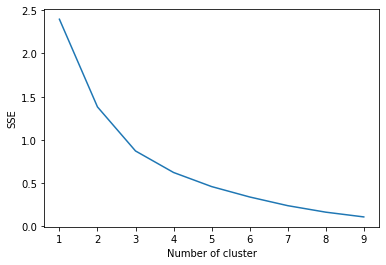

In [144]:
la_grouped_clustering = la_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(la_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import numpy as np

### Silhouette Scores and Cluster Visualizations

For 2  Clusters  the average silhouette_score is : 0.8222307158741615
For 3  Clusters  the average silhouette_score is : 0.7202385763726352
For 4  Clusters  the average silhouette_score is : 0.7324922480760543
For 5  Clusters  the average silhouette_score is : 0.7407698231740262


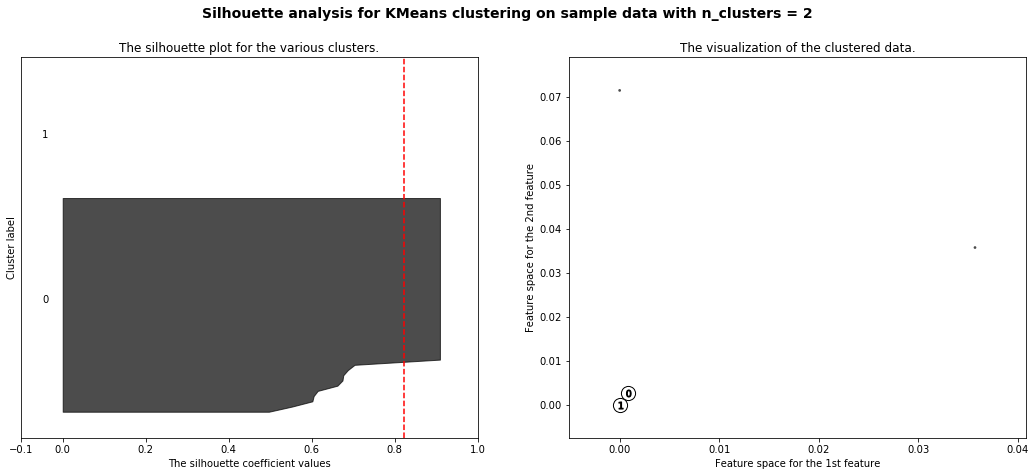

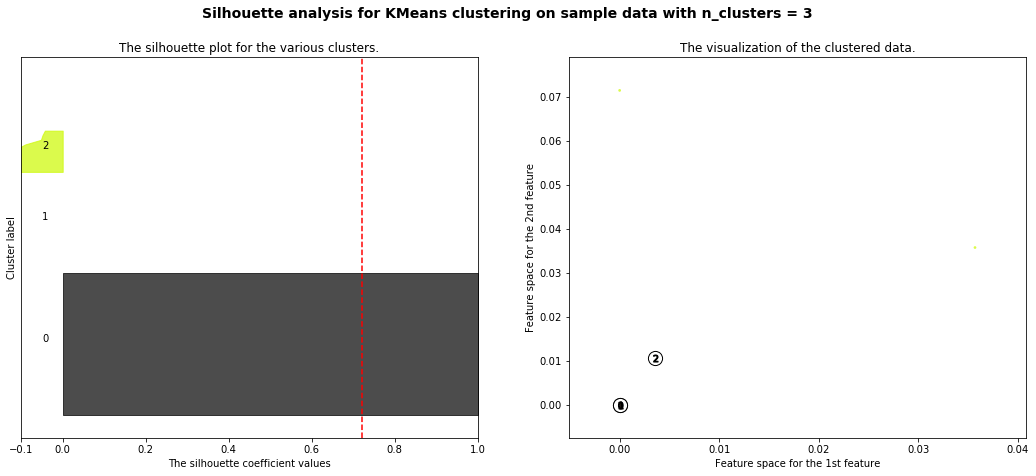

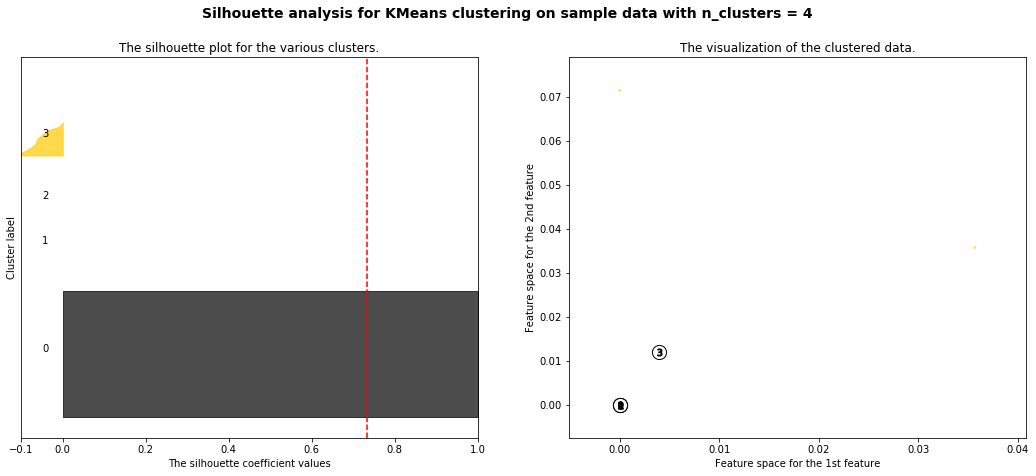

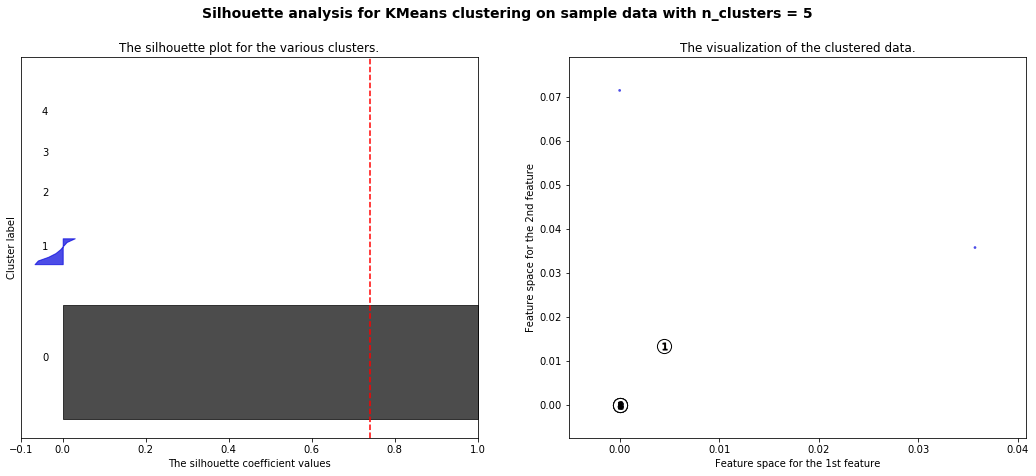

In [146]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(la_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(la_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(la_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(la_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(la_grouped_clustering.iloc[:, 0], la_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [167]:
kclusters = 3

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [168]:
la_merged = df_la

# add clustering labels
la_merged['Cluster Labels'] = kmeans.labels_

# merge la_grouped with la_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merged.head()# check the last columns!

,PostalCode,latitude,longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,90069,33.786594,-118.298662,West Hollywood,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
1,90201,33.976663,-118.168903,Bell,0,Pizza Place,Burger Joint,Food & Drink Shop,Food,Salvadoran Restaurant,Clothing Store,Seafood Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
2,90202,33.786594,-118.298662,Bell Gardens,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
3,90245,33.786594,-118.298662,El Segundo,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
4,90254,33.786594,-118.298662,Hermosa Beach,2,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


In [159]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=9)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(la_merged['latitude'], la_merged['longitude'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


## Cluster Neighborhood

### cluster 1

In [169]:
df1=la_merged.loc[la_merged['Cluster Labels'] == 0,la_merged.columns[[3] + list(range(5, la_merged.shape[1]))]]
df1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Hollywood,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
1,Bell,Pizza Place,Burger Joint,Food & Drink Shop,Food,Salvadoran Restaurant,Clothing Store,Seafood Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
2,Bell Gardens,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
3,El Segundo,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
5,Huntington Park,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Café,Grocery Store,Sandwich Place,Convenience Store,Pharmacy,Burger Joint,Fried Chicken Joint
7,Maywood,Mexican Restaurant,Convenience Store,Pizza Place,Burger Joint,ATM,Gas Station,Video Store,Latin American Restaurant,Fried Chicken Joint,Fast Food Restaurant
8,Pacific Palisades,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
9,Palos Verdes Peninsula,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
13,Montebello,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
15,Avalon,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


### cluster 2

In [170]:
df2=la_merged.loc[la_merged['Cluster Labels'] == 1,la_merged.columns[[3] + list(range(5, la_merged.shape[1]))]]
df2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Rancho Palos Verdes,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


### cluster 3

In [171]:
df3=la_merged.loc[la_merged['Cluster Labels'] == 2,la_merged.columns[[3] + list(range(5, la_merged.shape[1]))]]
df3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hermosa Beach,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
6,Lynwood,Park,Storage Facility,Convenience Store,Coffee Shop,Mexican Restaurant,Pharmacy,Light Rail Station,Seafood Restaurant,Bank,Asian Restaurant
11,South Gate,Bank,Wings Joint,Convenience Store,Mobile Phone Shop,Mexican Restaurant,Garden,Furniture / Home Store,Frozen Yogurt Shop,Gas Station,Fried Chicken Joint
12,Topanga,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
14,Cerritos,Korean Restaurant,Food Truck,Performing Arts Venue,Garden,Concert Hall,Pet Store,Farmers Market,Pizza Place,Café,Mobile Phone Shop
20,Mount Wilson,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
21,Verdugo City,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
27,Baldwin Park,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
30,Hacienda Heights,Optical Shop,Wings Joint,Hotel,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop
33,Mt Baldy,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


In [172]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"]
                      })

In [173]:
clusters = clusters.replace(np.nan, '', regex=True)

In [174]:
clusters

,Cluster1,Cluster2,Cluster3
0,West Hollywood,,
1,Bell,,
2,Bell Gardens,,
3,El Segundo,,
4,,,Hermosa Beach
5,Huntington Park,,
6,,,Lynwood
7,Maywood,,
8,Pacific Palisades,,
9,Palos Verdes Peninsula,,


In [177]:
new_la=la_merged.set_index("Neighborhood",drop=True)
new_la

,PostalCode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
West Hollywood,90069,33.786594,-118.298662,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
Bell,90201,33.976663,-118.168903,0,Pizza Place,Burger Joint,Food & Drink Shop,Food,Salvadoran Restaurant,Clothing Store,Seafood Restaurant,Shoe Store,Mexican Restaurant,Mobile Phone Shop
Bell Gardens,90202,33.786594,-118.298662,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
El Segundo,90245,33.786594,-118.298662,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
Hermosa Beach,90254,33.786594,-118.298662,2,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop
Huntington Park,90255,33.977987,-118.213137,0,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Café,Grocery Store,Sandwich Place,Convenience Store,Pharmacy,Burger Joint,Fried Chicken Joint
Lynwood,90262,33.924538,-118.202954,2,Park,Storage Facility,Convenience Store,Coffee Shop,Mexican Restaurant,Pharmacy,Light Rail Station,Seafood Restaurant,Bank,Asian Restaurant
Maywood,90270,33.988463,-118.187376,0,Mexican Restaurant,Convenience Store,Pizza Place,Burger Joint,ATM,Gas Station,Video Store,Latin American Restaurant,Fried Chicken Joint,Fast Food Restaurant
Pacific Palisades,90272,33.786594,-118.298662,0,Sandwich Place,Thai Restaurant,Convenience Store,Motorcycle Shop,Fast Food Restaurant,Liquor Store,Deli / Bodega,Cosmetics Shop,Coffee Shop,Donut Shop


In [297]:
new_la_population=pd.DataFrame({
   
"White":[65788,22336,21655,13686,13267,33665,12666,8766,7736,123366,67556,60161,60161,6868,6868,33597,33597,19093,17618,17618,21786,21786,20253,20253,16855,9667,26585,13060,17705,48788,36336,32655,65788,22336,15655,13686,13267,33665,12666,8766,8736,123366,67556],
"Black":[8667, 567, 696,1662,607, 1360, 3552,888,888, 756,1592,1592,1592,2863, 2863,1353,1353,655,1051,1051,236,236,666,666,12333,1039,3531,5596,676, 4788,2336,565,967, 587, 646,662,607, 890, 3552,828,888, 656,892],
"Asian": [6655,1213,1667,2566,5670, 8681,2089,907,888,1212,2318, 2318,2318, 969,969, 2078, 2078,1086,1065, 1065,887, 887,989,989,3660,808,3010,3055,869, 2788,1855,1413,967,2566,5670, 7681,2089,907,788,912,1418, 1918,1586],
"Indian":[5666,8977,3665,6060,6279,15749,6160,1665,1665, 2176,6775,6775,6775,3606, 3606,9902,9902,1507,2210,2210,1286,1286,1575,1575,15057,2098,6556,7629,1768, 488,366,8977,3665,6060,6279,18749,4160,1265,1665, 2176,2375,4275,6775]
}
)
new_la_population.head()

,White,Black,Asian,Indian
0,65788,8667,6655,5666
1,22336,567,1213,8977
2,21655,696,1667,3665
3,13686,1662,2566,6060
4,13267,607,5670,6279


In [298]:
new_la_population["Neighborhood"]=la_merged["Neighborhood"]

In [299]:
new_la_population

,White,Black,Asian,Indian,Neighborhood
0,65788,8667,6655,5666,West Hollywood
1,22336,567,1213,8977,Bell
2,21655,696,1667,3665,Bell Gardens
3,13686,1662,2566,6060,El Segundo
4,13267,607,5670,6279,Hermosa Beach
5,33665,1360,8681,15749,Huntington Park
6,12666,3552,2089,6160,Lynwood
7,8766,888,907,1665,Maywood
8,7736,888,888,1665,Pacific Palisades
9,123366,756,1212,2176,Palos Verdes Peninsula


In [214]:
!pip install plotly
!pip install chart_studio

## Los Angeles Population Distribution Analysis

In [300]:
import plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go

x = df_la["Neighborhood"]

y1 =[65788,22336,21655,13686,13267,33665,12666,8766,7736,123366,67556,60161,60161,6868,6868,33597,33597,19093,17618,
     17618,21786,21786,20253,20253,16855,9667,26585,13060,17705,48788,36336,32655,65788,22336,15655,13686,13267,33665,12666,8766,8736,123366,67556]
y2 =[8667, 567, 696,1662,607, 1360, 3552,888,888, 756,1592,1592,1592,2863, 2863,1353,1353,655,1051,1051,236,236,666,666, 
     12333,1039,3531,5596,676, 4788,2336,565,967, 587, 646,662,607, 890, 3552,828,888, 656,892]
y3= [6655,1213,1667,2566,5670, 8681,2089,907,888,1212,2318, 2318,2318, 969,969, 2078, 2078,1086,1065, 1065,887,
     887,989,989,3660,808,3010,3055,869, 2788,1855,1413,967,2566,5670, 7681,2089,907,788,912,1418, 1918]
y4= [5666,8977,3665,6060,6279,15749,6160,1665,1665, 2176,6775,6775,6775,3606, 3606,9902,9902,1507,2210,2210,1286,1286,
     1575,1575,15057,2098,6556,7629,1768, 488,366,8977,3665,6060,6279,18749,4160,1265,1665, 2176,2375,4275,6775]

trace1 = go.Bar(
    x=x,
    y=y1,
    name="White",
    textposition = 'auto',
    marker=dict(
        color= "red",
        line=dict(
            color="red",
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    name="Black",
    textposition = 'auto',
    marker=dict(
        color='blue',
        line=dict(
            color='blue',
            width=1.5),
        ),
    opacity=0.6
)

trace3 = go.Bar(
    x=x,
    y=y3,
    name="Asian",
    textposition = 'auto',
    marker=dict(
        color='yellow',
        line=dict(
            color='yellow',
            width=1.5),
        ),
    opacity=0.6
)

trace4 = go.Bar(
    x=x,
    y=y4,
    name="Indian",
    textposition = 'auto',
    marker=dict(
        color='rgb(158,40,155)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2,trace3,trace4]

py.iplot(data, filename='grouped-bar-direct-labels')

In [301]:
la_school_ratings=pd.DataFrame({"Neighborhood":df_la["Neighborhood"],
        "Top School Rating":[9,8,8,8,9,6,8,9,4,4,4,10,8,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,3,
                            6,8,8,8,5,6,8,9,4,3,4,7,4]})


In [302]:
la_school_ratings.head()

,Neighborhood,Top School Rating
0,West Hollywood,9
1,Bell,8
2,Bell Gardens,8
3,El Segundo,8
4,Hermosa Beach,9


In [303]:
la_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

### Los Angeles Neighborhoods School Ratings Analysis

In [304]:
data = [go.Bar(
            x=df_la["Neighborhood"],
            y=[9,8,8,8,5,6,8,9,4,4,4,10,8,4,4,5,6,4,3,6,10,5,5,9,4,4,4,3,4,3,6,8,8,8,5,6,8,9,4,3,4,7,4],
     marker=dict(
        color='rgb(158,120,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [317]:
La_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_la["Neighborhood"],
                 "Average_Housing_Price":[872050.0,573500.0,997860.0,779200.0,1825800.0,825770.0,973570.0,1370507.0,
                                          736570.0,733500.0,335060.0,335708.0,286600.0,286600.0,987300.0,375700.0,                                                                         
                                          1286300.0,732500.0,733700.0,335030.0,335200.0,283600.0,786600.0,533560.0,
                                          1333000.0,286630.0,733200.0,333300.0,335070.0,1339000.0,656300.0,687600.0,
                                          733200.0,335000.0,335376.0,435600.0,286200.0,286600.0,732500.0,225900.0,
                                          737500.0,335090.0,733500.0         
                                      ]})

In [318]:
La_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

### Los Angeles Neighborhoods Median Housing Price Analysis

In [319]:
data = [go.Bar(
            x=df_la["Neighborhood"],
            y=[872050.0,573500.0,997860.0,779200.0,1825800.0,825770.0,973570.0,1370507.0,
                                          736570.0,733500.0,335060.0,335708.0,286600.0,286600.0,987300.0,375700.0,                                                                         
                                          1286300.0,732500.0,733700.0,335030.0,335200.0,283600.0,786600.0,533560.0,
                                          1333000.0,286630.0,733200.0,333300.0,335070.0,1339000.0,656300.0,687600.0,
                                          733200.0,335000.0,335376.0,435600.0,286200.0,286600.0,732500.0,225900.0,
                                          737500.0,335090.0,733500.0          
            ],
     marker=dict(
        color='green',
        line=dict(
            color='green',
            width=1.5,
        )
    ),
    opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

In [279]:
new_la_population["Neighborhood"]=la_merged["Neighborhood"]
new_la_population1=new_la_population.set_index("Neighborhood")
new_la_population1.head()

,White,Black,Asian,Indian
Neighborhood,,,,
West Hollywood,65788,8667,6655,5666
Bell,22336,567,1213,8977
Bell Gardens,21655,696,1667,3665
El Segundo,13686,1662,2566,6060
Hermosa Beach,13267,607,5670,6279



Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below

* More Indian Population
* Higher School Rating
* Better Housing Price
* Comfortable Neighborhoods



In [241]:
Nei1=input("Enter the Neighborhood: ")

Enter the Neighborhood:  Hermosa Beach


In [244]:
Nei2=input("Enter the Neighborhood: ")

Enter the Neighborhood:  Rowland Heights


In [280]:
Venue_comparison=new_la.loc[[Nei1,Nei2]].T
Venue_comparison

Neighborhood,Hermosa Beach,Rowland Heights
PostalCode,90254,91748
latitude,33.7866,33.9662
longitude,-118.299,-117.917
Cluster Labels,2,0
1st Most Common Venue,Sandwich Place,Other Great Outdoors
2nd Most Common Venue,Thai Restaurant,Trail
3rd Most Common Venue,Convenience Store,Playground
4th Most Common Venue,Motorcycle Shop,Park
5th Most Common Venue,Fast Food Restaurant,Flea Market
6th Most Common Venue,Liquor Store,Deli / Bodega


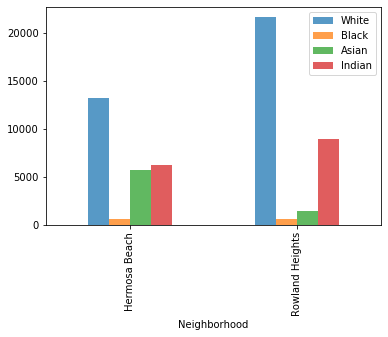

In [308]:
Population_Comparison=new_la_population1.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)
plt.show()

In [309]:
Population_Comparison['Indian']

Neighborhood
Hermosa Beach      6279
Rowland Heights    8977
Name: Indian, dtype: int64

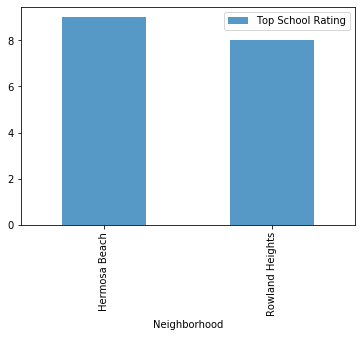

In [310]:
School_rating_comparison=la_school_ratings.loc[[Nei1,Nei2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);
plt.show()

In [311]:
School_rating_comparison

,Top School Rating
Neighborhood,
Hermosa Beach,9
Rowland Heights,8


In [320]:
Avg_housing_price_comparison= La_Avg_HousingPrice.loc[[Nei1,Nei2]]
Avg_housing_price_comparison

,Average_Housing_Price
Neighborhood,
Hermosa Beach,1825800.0
Rowland Heights,687600.0


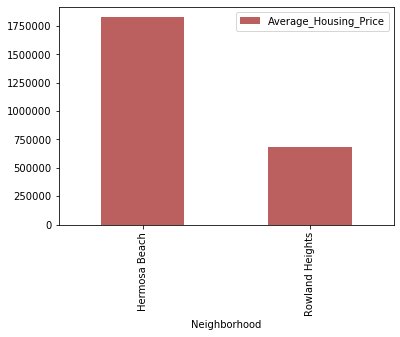

In [321]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='brown');
plt.show()

# **Conclusion:**

This Analysis concludes that the two places of Los Angeles Hermosa Beach and Rowland Heights.<br> 
Both has great amenities and locality, but quite different: Hermosa is seashore, Rowland Heights in and below the Puente Hills in the San Gabriel Valley, near the National Parks.
Of course the have different housepricing: out of these two Rowland Heights has better prospects for buying houses or choose for rental houses. Rowland Heights has the higher number of Indian population, but school rating is good in both areas 8+. Top 10 common venues shows Hermosa Beach has got a good neighborhood with Restaurants, Convenience Store, Cosmetic Shop, Donot Shop and many more. But housing price there is very high. 
If you have money - Hermosa is perfect place! But if you need more comfortable prices and Parks and Trails nearby Rowland Heights is for you.
<br><br>
So, we can see that our research helps user to compare two neighborhood and recommend options with facts.

